In [2]:
import torch
from fastai.vision.all import *
import re

In [3]:
import os,sys,inspect
sys.path.insert(0, '..') 

In [4]:
from lib.modules.matcher import HungarianMatcher
from lib.modules.parallel import *
from lib.modules.sequential import *
from lib.modules.single_classifier import SingleClassifier
from lib.modules.matcher import HungarianMatcher
from lib.modules.parallel import *
from lib.modules.sequential import *
from lib.modules.single_classifier import SingleClassifier
from lib.label import *
from lib.label import *
from lib.metric import *
from lib.data import *
from lib.loss import *
from lib.loader import *

In [5]:
data = load_data(84, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=[], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()

In [5]:
model

MultiDartPlus(
  (head): Sequential(
    (0): Linear(in_features=1049, out_features=512, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=512, out_features=27, bias=True)
  )
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stri

In [5]:
len(data.train_ds)

150035

SuggestedLRs(lr_min=0.002754228748381138, lr_steep=0.015848932787775993)

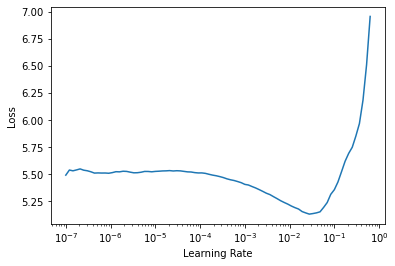

In [10]:
learn.lr_find()

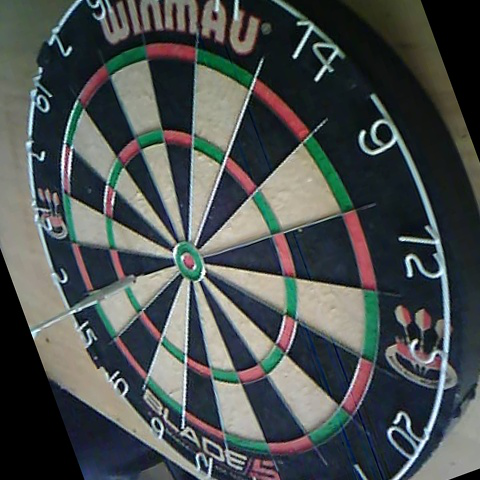

In [6]:
data.train_ds[0][0][0]

In [7]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.716705,1.060904,0.823290,0.735812,19:36
1,0.307915,0.611155,0.891746,0.842140,20:14
2,0.127398,0.238475,0.964069,0.945858,20:33


In [8]:
learn.save('480-square-1')

Path('models/480-square-1.pth')

In [11]:
learn.load('480-square-1')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=2.75422871709452e-06)

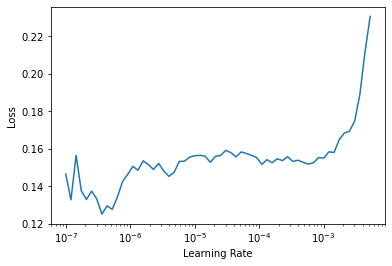

In [12]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(3, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.135270,0.220555,0.969132,0.955643,20:25
1,0.092878,0.190548,0.973229,0.960861,19:45
2,0.082136,0.178269,0.975711,0.964123,19:45


In [14]:
learn.save('480-square-2')

Path('models/480-square-2.pth')

In [5]:
len(data.train_ds)

266601

In [6]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.569821,0.992312,0.842418,0.777560,34:42
1,0.509091,0.986975,0.844132,0.767123,34:48
2,0.427891,0.866564,0.861725,0.804305,34:53
3,0.334804,0.820025,0.871790,0.813438,34:57
4,0.294638,0.798364,0.873109,0.810176,34:58
5,0.240293,0.541640,0.914140,0.874103,35:00
6,0.163237,0.486065,0.926109,0.897586,35:02
7,0.115879,0.378376,0.930402,0.896282,35:02
8,0.058798,0.216874,0.970789,0.955643,35:01
9,0.039434,0.172036,0.975878,0.963470,35:02


In [7]:
learn.save('480-square-3')

Path('models/480-square-3.pth')

SuggestedLRs(lr_min=3.0199516913853586e-06, lr_steep=1.0964781722577754e-06)

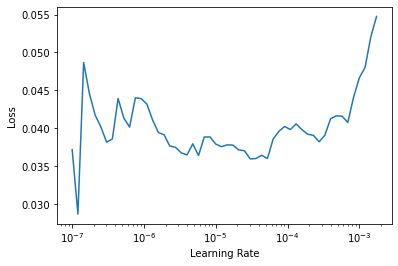

In [8]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(6, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.037022,0.162280,0.979562,0.969341,35:08
1,0.038241,0.146340,0.977488,0.965427,35:11
2,0.041500,0.139470,0.980762,0.971298,35:11
3,0.031187,0.135843,0.980329,0.969994,35:11
4,0.029946,0.134111,0.981215,0.971950,35:13
5,0.030528,0.134569,0.981097,0.971950,35:18


In [10]:
learn.save('480-square-4')

Path('models/480-square-4.pth')

In [11]:
data = load_data(84, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=['generated'], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-square-4')
learn.fit_one_cycle(6, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.374556,1.056096,0.838535,0.748859,00:43
1,0.862010,0.617939,0.885020,0.819961,00:43
2,0.592675,0.419454,0.922633,0.878017,00:43
3,0.457787,0.370981,0.931276,0.891716,00:43
4,0.392285,0.349573,0.936200,0.899543,00:43
5,0.357805,0.347273,0.936202,0.899543,00:43


In [12]:
learn.fit_one_cycle(20, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.338815,0.325027,0.940796,0.907371,00:43
1,0.331116,0.295261,0.946165,0.915199,00:43
2,0.312763,0.299495,0.942874,0.909980,00:43
3,0.280634,0.231312,0.962321,0.941944,00:43
4,0.243645,0.186066,0.972627,0.957600,00:43
5,0.211092,0.190246,0.974231,0.960861,00:43
6,0.188618,0.168252,0.977971,0.966080,00:43
7,0.175512,0.140872,0.979933,0.969341,00:43
8,0.148487,0.133922,0.982399,0.973255,00:43
9,0.142565,0.132899,0.983283,0.974560,00:43


In [13]:
learn.save('480-square-5')

Path('models/480-square-5.pth')

In [14]:
learn.fit_one_cycle(40, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.104336,0.104591,0.987391,0.981083,00:43
1,0.102169,0.103531,0.986612,0.979778,00:43
2,0.098952,0.095121,0.989113,0.983692,00:43
3,0.096950,0.089408,0.987126,0.980431,00:43
4,0.088251,0.079380,0.988416,0.982387,00:43
5,0.086728,0.095193,0.985019,0.977169,00:43
6,0.081231,0.093141,0.987125,0.980431,00:43
7,0.080458,0.134849,0.981821,0.971950,00:43
8,0.087927,0.127952,0.978705,0.967384,00:43
9,0.078957,0.087548,0.988381,0.981735,00:43


In [15]:
learn.save('480-square-6')
learn.fit_one_cycle(40, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.011497,0.084324,0.989266,0.983040,00:44
1,0.008384,0.083104,0.989672,0.983692,00:43
2,0.008073,0.082427,0.990104,0.984344,00:43
3,0.007511,0.083311,0.990104,0.984344,00:43
4,0.009076,0.082161,0.990076,0.984344,00:43
5,0.008609,0.081685,0.990104,0.984344,00:43
6,0.008338,0.082690,0.991316,0.986301,00:43
7,0.011215,0.085040,0.989722,0.984344,00:43
8,0.010251,0.085480,0.988825,0.982388,00:43
9,0.009346,0.081796,0.990065,0.984344,00:43


In [16]:
learn.save('480-square-7')

Path('models/480-square-7.pth')

In [17]:
preds = learn.get_preds()

In [48]:
preds

(tensor([[ -4.1680,  -3.7246,  -4.4336,  ...,  -4.6602,  -6.7852, -12.5391],
         [ 14.0859,  -1.5674,  -1.7148,  ...,  -3.4883,  -3.2598,  -2.8535],
         [ -0.5005,   1.7773,   0.8188,  ...,  -3.6055,  -3.6660,  -2.8359],
         ...,
         [ 12.2578,  -2.9375,  -2.8809,  ...,  -2.9199,  -3.5059,  -5.3945],
         [  0.7715,  -3.4707,  -4.5547,  ...,  -3.1250,  -4.0742,  -3.5977],
         [ -0.0215,  -2.4199,  -4.0078,  ...,  -4.3984,  -4.9219,  -3.7656]]),
 TensorMultiCategory([[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]))

In [45]:
data.valid_ds[0]

((PILImage mode=RGB size=480x480, PILImage mode=RGB size=480x480),
 TensorMultiCategory([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 TensorMultiCategory([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0.]))

In [65]:
def get_classes(output):
    slices = [categories[x] for x in output.view(-1, 27)[:,:20].argmax(-1)]
    rings = [categories[x] for x in output.view(-1, 27)[:,20:].argmax(-1) + 20]
    return [(x,y) if y not in ['0-z0', '0-z25-1', '0-z25-2'] else (y) for x, y in list(zip(slices, rings))]

In [32]:
print([categories[x] for x in preds[1][0].view(-1, 27)[:,:20].argmax(-1)])
print([categories[x] for x in preds[1][0].view(-1, 27)[:,20:].argmax(-1) + 20])

['0-12', '0-8', '0-5']
['0-x1', '0-x3', '0-x1']


In [41]:
get_classes(data.valid_ds[0][1])

[('0-12', '0-x1'), ('0-8', '0-x3'), ('0-5', '0-x1')]

In [42]:
get_classes(preds[1][0])

[('0-12', '0-x1'), ('0-8', '0-x3'), ('0-5', '0-x1')]

In [66]:
for i in range(0, len(data.valid_ds)):
    p = get_classes(data.valid_ds[i][1])
    y = get_classes(preds[0][i])
    if not p == y: print(i, p, y)

126 [('0-8', '0-x1'), ('0-9', '0-x1'), ('0-6', '0-x1')] ['0-z0', ('0-9', '0-x1'), '0-z0']
135 [('0-19', '0-x1'), ('0-17', '0-x1'), '0-z0'] [('0-19', '0-x1'), ('0-3', '0-x1'), '0-z0']
168 [('0-2', '0-x1'), ('0-13', '0-x1'), ('0-5', '0-x1')] [('0-2', '0-x1'), ('0-6', '0-x1'), ('0-5', '0-x1')]
170 [('0-2', '0-x1'), ('0-13', '0-x1'), '0-z0'] [('0-2', '0-x1'), ('0-6', '0-x1'), '0-z0']
180 ['0-z25-1', ('0-17', '0-x1'), ('0-15', '0-x1')] ['0-z25-1', '0-z25-1', ('0-15', '0-x1')]
191 [('0-9', '0-x1'), ('0-11', '0-x1'), ('0-7', '0-x1')] [('0-9', '0-x1'), ('0-11', '0-x1'), ('0-16', '0-x1')]
194 [('0-14', '0-x1'), '0-z25-1', '0-z25-2'] [('0-14', '0-x1'), '0-z25-2', '0-z25-2']
251 [('0-11', '0-x1'), ('0-15', '0-x1'), ('0-15', '0-x3')] [('0-11', '0-x1'), ('0-2', '0-x1'), ('0-2', '0-x3')]
260 [('0-19', '0-x1'), '0-z0', '0-z0'] [('0-17', '0-x1'), ('0-17', '0-x1'), ('0-17', '0-x1')]
356 [('0-12', '0-x1'), ('0-5', '0-x1'), '0-z0'] [('0-12', '0-x1'), '0-z0', '0-z0']
371 [('0-20', '0-x1'), ('0-20', '0-x3'

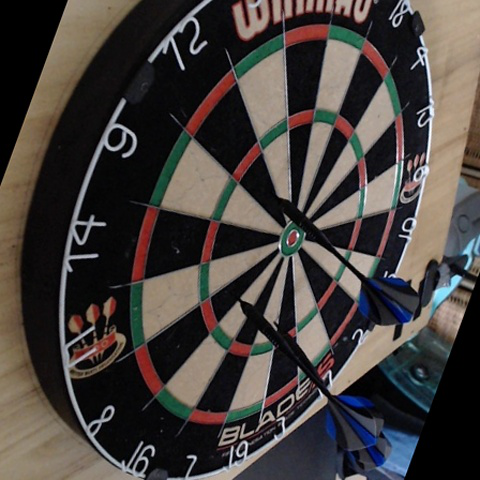

In [76]:
data.valid_ds[435][0][1]

In [4]:
data = load_data(128, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=[], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.499163,0.875906,0.861934,0.801696,33:55
1,0.219893,0.707842,0.884127,0.821266,33:53
2,0.086584,0.208583,0.969291,0.954338,33:57


SuggestedLRs(lr_min=1.318256749982538e-07, lr_steep=1.0964781722577754e-06)

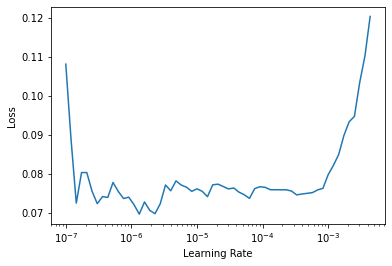

In [5]:
learn.lr_find()

In [6]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.075505,0.195610,0.971694,0.957600,34:01


SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=7.585775847473997e-07)

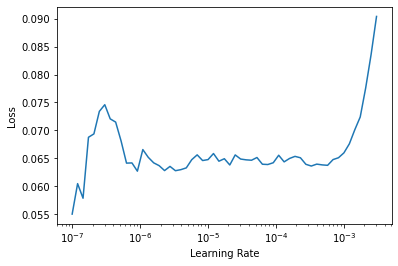

In [7]:
learn.lr_find()

In [8]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.064958,0.163056,0.975576,0.963470,34:04


In [9]:
learn.save('480-square-8')

Path('models/480-square-8.pth')

In [10]:
learn.fit_one_cycle(1, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.062098,0.166652,0.975166,0.963470,34:02


In [11]:
learn.load('480-square-8')
learn.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.056242,0.163684,0.974660,0.962166,34:02


In [12]:
data = load_data(84, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=['generated'], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-square-8')

SuggestedLRs(lr_min=4.786300996784121e-05, lr_steep=0.00010964782268274575)

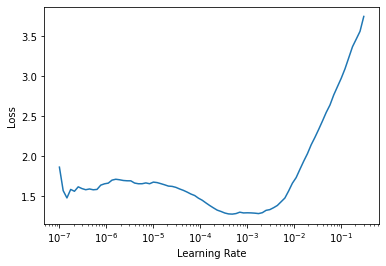

In [14]:
learn.lr_find()

In [15]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.085215,0.621360,0.897549,0.841487,00:43
1,0.570324,0.271096,0.961380,0.939987,00:43
2,0.352918,0.206927,0.962409,0.942596,00:43
3,0.235754,0.121812,0.980371,0.969993,00:43
4,0.176068,0.124137,0.980972,0.970646,00:43
5,0.137892,0.089986,0.985861,0.978474,00:43
6,0.114635,0.093832,0.983721,0.975864,00:43
7,0.099107,0.081980,0.986310,0.978474,00:43
8,0.092132,0.081828,0.986704,0.979778,00:43
9,0.082875,0.080424,0.986704,0.979778,00:43


In [16]:
learn.save('480-square-9')

Path('models/480-square-9.pth')

SuggestedLRs(lr_min=7.585775892948732e-06, lr_steep=7.585775847473997e-07)

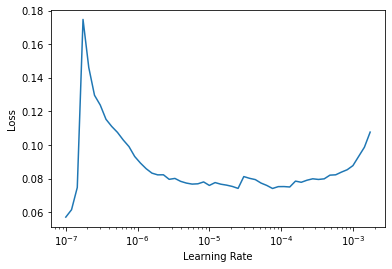

In [17]:
learn.lr_find()

In [18]:
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.080157,0.073779,0.988322,0.982388,00:42
1,0.080460,0.103580,0.983763,0.975864,00:43
2,0.090875,0.112016,0.975313,0.961513,00:46
3,0.093556,0.084485,0.985497,0.977169,00:43
4,0.082806,0.077262,0.987293,0.979778,00:43
5,0.070888,0.075447,0.987224,0.979778,00:43
6,0.058959,0.057914,0.988904,0.983040,00:43
7,0.055755,0.057952,0.989290,0.983692,00:43
8,0.048308,0.057703,0.989261,0.983040,00:43
9,0.046059,0.056465,0.988448,0.982387,00:43


In [20]:
learn.save('480-square-9')

Path('models/480-square-9.pth')

SuggestedLRs(lr_min=8.31763736641733e-07, lr_steep=7.585775847473997e-07)

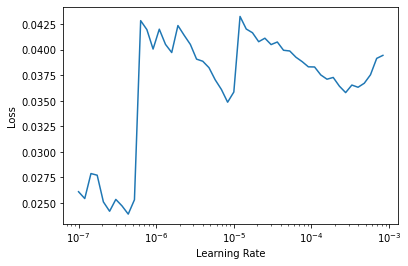

In [19]:
learn.lr_find()

In [21]:
learn.fit_one_cycle(10, 1e-7)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.045131,0.058483,0.988448,0.982387,00:43
1,0.045140,0.058351,0.989261,0.983040,00:43
2,0.042330,0.056489,0.988473,0.982388,00:43
3,0.042495,0.057507,0.988448,0.982387,00:43
4,0.046938,0.055407,0.988876,0.983040,00:43
5,0.044285,0.057022,0.988876,0.983040,00:43
6,0.043658,0.056777,0.988448,0.982387,00:43
7,0.042167,0.057132,0.988448,0.982387,00:43
8,0.042311,0.057442,0.988448,0.982387,00:43
9,0.045650,0.055378,0.988852,0.983040,00:43


In [22]:
learn.load('480-square-9')
learn.fit_one_cycle(10, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.047627,0.056278,0.988448,0.982387,00:43
1,0.040509,0.055500,0.988448,0.982387,00:43
2,0.042036,0.055591,0.989245,0.983692,00:43
3,0.039309,0.055904,0.990122,0.984997,00:43
4,0.037566,0.058409,0.988905,0.983040,00:43
5,0.039275,0.055308,0.990151,0.984997,00:43
6,0.040366,0.054561,0.989309,0.983692,00:43
7,0.037056,0.052590,0.989278,0.983692,00:43
8,0.037376,0.055320,0.989309,0.983692,00:43
9,0.038032,0.055059,0.988869,0.983040,00:43


In [23]:
learn.load('480-square-9')
learn.fit_one_cycle(10, 1e-6)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.043047,0.055203,0.989275,0.983692,00:43
1,0.047218,0.057471,0.988045,0.981735,00:43
2,0.043740,0.056077,0.988876,0.983040,00:43
3,0.042030,0.054936,0.988448,0.982387,00:43
4,0.041221,0.053225,0.991315,0.986954,00:43
5,0.041503,0.053135,0.990098,0.984997,00:43
6,0.039825,0.054893,0.990098,0.984997,00:43
7,0.041779,0.054995,0.988876,0.983040,00:43
8,0.039353,0.055168,0.989670,0.984344,00:43
9,0.038320,0.056157,0.989280,0.983692,00:43


In [24]:
learn.load('480-square-9')
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.035367,0.055287,0.989699,0.984344,00:43
1,0.040689,0.072509,0.989732,0.983692,00:43
2,0.062680,0.082172,0.985951,0.978474,00:43
3,0.069726,0.079124,0.987679,0.980431,00:43
4,0.056219,0.048642,0.991292,0.986301,00:43
5,0.046558,0.048280,0.991433,0.987606,00:43
6,0.038771,0.049812,0.990947,0.986954,00:43
7,0.033770,0.048739,0.991808,0.988258,00:43
8,0.030523,0.051197,0.990164,0.986301,00:43
9,0.030783,0.050946,0.989755,0.985649,00:43


In [5]:
data = load_data(128, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=[], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()

In [6]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.595296,1.080771,0.818230,0.729941,33:46
1,0.387422,0.976729,0.834638,0.747554,33:49
2,0.239175,0.777641,0.866245,0.810828,33:52
3,0.117923,0.266353,0.963078,0.943249,33:54
4,0.061064,0.195887,0.967584,0.953033,34:00


In [4]:
data = load_data(128, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=[], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()

In [5]:
learn.fit_one_cycle(3)
learn.save('480-square-11')

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.520983,1.210351,0.797290,0.699935,33:46
1,0.229214,0.511846,0.909991,0.870189,33:48
2,0.088340,0.223324,0.966305,0.949772,33:51


Path('models/480-square-11.pth')

In [6]:
learn.fit_one_cycle(3, 1e-4)
learn.save('480-square-12')

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.094181,0.258152,0.955813,0.934768,33:50
1,0.068544,0.191318,0.967131,0.950424,33:52
2,0.055457,0.174310,0.972966,0.959556,33:54


Path('models/480-square-12.pth')

In [7]:
learn.fit_one_cycle(3, 1e-5)
learn.save('480-square-12')

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.055608,0.173764,0.973723,0.960861,33:53
1,0.049813,0.163430,0.972431,0.958252,33:54
2,0.048355,0.162931,0.974091,0.960861,33:56


Path('models/480-square-12.pth')

In [8]:
data = load_data(128, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=['generated'], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-square-12')
learn.fit_one_cycle(20, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.340530,0.809508,0.872405,0.801696,00:43
1,0.873177,0.607208,0.897411,0.840183,00:43
2,0.582754,0.299173,0.941333,0.908676,00:43
3,0.413438,0.193620,0.966704,0.947815,00:43
4,0.302682,0.153352,0.972110,0.958252,00:43
5,0.228960,0.166250,0.972222,0.957599,00:43
6,0.178022,0.104359,0.984926,0.976517,00:43
7,0.147751,0.102239,0.984613,0.976517,00:43
8,0.123369,0.093086,0.982878,0.974560,00:44
9,0.108990,0.084631,0.987009,0.979778,00:43


In [9]:
learn.save('480-square-13')

Path('models/480-square-13.pth')

In [10]:
learn.fit_one_cycle(3, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.050482,0.080403,0.987453,0.980431,00:43
1,0.044162,0.078350,0.987022,0.979778,00:43
2,0.046218,0.080408,0.987022,0.979778,00:43


In [11]:
learn.load('480-square-13')

In [12]:
torch.save(learn.model.state_dict(), '/home/kevin/Projekte/DartNet/finder/models/480-square-13.pkl')

In [4]:
darts = torch.zeros(4,3,27)

In [6]:
darts[:,0, 26] > 0

tensor([False, False, False, False])

In [5]:
data = load_data(128, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=['generated'], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-square-13')
learn.fit_one_cycle(30, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.137347,0.080562,0.987911,0.981083,00:49
1,0.094052,0.094344,0.987494,0.980431,00:45
2,0.074967,0.085279,0.988731,0.982387,00:45
3,0.065057,0.095364,0.987099,0.979778,00:45
4,0.064018,0.079172,0.989140,0.983040,00:45
5,0.060300,0.073005,0.989134,0.983692,00:45
6,0.061256,0.113455,0.979516,0.969341,00:45
7,0.063359,0.103770,0.981717,0.971298,00:45
8,0.055041,0.121070,0.980862,0.969993,00:45
9,0.053733,0.158042,0.978377,0.967384,00:45


In [6]:
data = load_data(128, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=['generated'], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-square-12')
learn.fit_one_cycle(20, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.618156,0.888220,0.859037,0.781474,00:45
1,1.024050,0.680717,0.889987,0.829093,00:45
2,0.670022,0.342020,0.935604,0.900848,00:45
3,0.454466,0.240366,0.958950,0.936073,00:45
4,0.321149,0.262076,0.964300,0.944553,00:45
5,0.239813,0.146385,0.977161,0.964775,00:45
6,0.182973,0.159254,0.977785,0.966080,00:45
7,0.151000,0.122717,0.982433,0.972603,00:45
8,0.122465,0.131343,0.982014,0.971950,00:45
9,0.106899,0.099897,0.985717,0.977821,00:45


In [7]:
learn.fit_one_cycle(20, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.045692,0.099349,0.982911,0.973255,00:45
1,0.044788,0.098759,0.983342,0.973907,00:45
2,0.048044,0.099862,0.982939,0.973255,00:45
3,0.046029,0.099915,0.984925,0.976517,00:45
4,0.044893,0.098407,0.983259,0.973907,00:45
5,0.045933,0.093653,0.984148,0.975212,00:45
6,0.043818,0.090100,0.985383,0.977169,00:45
7,0.041906,0.093577,0.984148,0.975212,00:45
8,0.043389,0.095119,0.984148,0.975212,00:45
9,0.040959,0.090046,0.985814,0.977821,00:45


In [8]:
data = load_data(128, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=['generated'], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-square-12')
learn.fit_one_cycle(60)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.110074,0.736698,0.893355,0.833659,00:45
1,0.659633,0.361281,0.939346,0.906067,00:45
2,0.414942,0.221117,0.969882,0.953686,00:45
3,0.288269,0.185862,0.976313,0.965427,00:45
4,0.227263,0.247218,0.962410,0.947162,00:45
5,0.209673,0.231764,0.967800,0.950424,00:45
6,0.202982,0.183564,0.970500,0.954338,00:45
7,0.216734,3.724364,0.651505,0.467058,00:45
8,0.254880,0.296700,0.951030,0.930855,00:45
9,0.271094,0.387386,0.952597,0.932811,00:45


In [ ]:
data = load_data(128, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=['generated'], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-square-12')
learn.fit_one_cycle(60)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.311598,0.774885,0.887971,0.825832,00:52
1,0.724888,0.320380,0.944194,0.913242,00:51
2,0.449717,0.207806,0.968828,0.952381,00:51
3,0.299633,0.145093,0.978564,0.967384,00:51
4,0.238903,0.152152,0.972757,0.958252,00:51
5,0.208947,0.175663,0.965619,0.949119,00:51
6,0.229033,0.209620,0.972653,0.960861,00:51
7,0.256595,0.431291,0.934731,0.900196,00:51
8,0.331168,0.338451,0.948792,0.923679,00:51
9,0.296147,0.340048,0.946985,0.924331,00:51


In [4]:
data = load_data(128, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=['generated'], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-square-12')
learn.fit_one_cycle(30, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,2.003896,1.104573,0.837852,0.747554,00:57
1,1.300220,0.833648,0.866099,0.791259,00:53
2,0.854881,0.477624,0.906644,0.853881,00:53
3,0.588891,0.376489,0.928749,0.889106,00:53
4,0.423297,0.234488,0.965361,0.946510,00:53
5,0.313170,0.231067,0.963951,0.945205,00:53
6,0.238820,0.161826,0.977925,0.966080,00:53
7,0.190403,0.139969,0.980439,0.969341,00:53
8,0.159437,0.116415,0.982236,0.972603,00:53
9,0.135536,0.103763,0.982488,0.975864,00:53


In [5]:
data = load_data(128, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=['generated'], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-square-12')
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.648445,0.891609,0.864115,0.788650,00:53
1,0.861811,0.372812,0.928178,0.888454,00:53
2,0.503691,0.216612,0.968806,0.953686,00:53
3,0.331802,0.141554,0.977973,0.966732,00:53
4,0.228850,0.114321,0.981286,0.971950,00:53
5,0.173078,0.104712,0.983328,0.973907,00:53
6,0.141351,0.101499,0.985411,0.977169,00:53
7,0.120363,0.093644,0.985835,0.977821,00:53
8,0.107681,0.095330,0.985384,0.977169,00:53
9,0.096245,0.091853,0.985835,0.977821,00:53


In [6]:
learn.fit_one_cycle(3, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.098970,0.087123,0.987044,0.979778,00:53
1,0.093740,0.085523,0.987078,0.979778,00:53
2,0.092049,0.085609,0.987508,0.980431,00:53


In [7]:
learn.fit_one_cycle(3, 1e-6)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.087990,0.086165,0.987078,0.979778,00:53
1,0.086681,0.086805,0.987105,0.979778,00:53
2,0.091080,0.085852,0.987050,0.979778,00:53


In [8]:
data = load_data(128, (480, 480), 'train', 'valid', max_rotate=5.0, exclude=['generated'], path = '../data_rotated')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-square-12')
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.302843,0.635994,0.898032,0.841487,00:52
1,0.631762,0.193613,0.971395,0.955643,00:53
2,0.384719,0.160770,0.979599,0.969341,00:53
3,0.257709,0.126192,0.982967,0.974560,00:53
4,0.195384,0.127074,0.981286,0.971298,00:53


In [9]:
learn.fit_one_cycle(3, 1e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.157201,0.122331,0.982939,0.973907,00:53
1,0.154778,0.122990,0.982558,0.973255,00:53
2,0.146121,0.117105,0.983745,0.975212,00:53


In [10]:
learn.load('480-square-12')
learn.fit_one_cycle(10, 1e-4)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.516115,0.810270,0.875573,0.805610,00:53
1,0.817479,0.341154,0.939424,0.906067,00:53
2,0.490751,0.235275,0.962299,0.941944,00:53
3,0.316731,0.137772,0.977556,0.966080,00:53
4,0.229463,0.121925,0.980021,0.969341,00:53
5,0.183534,0.125824,0.982556,0.972603,00:53
6,0.145634,0.086729,0.988335,0.981735,00:53
7,0.120868,0.086199,0.987502,0.980431,00:53
8,0.108189,0.089840,0.985439,0.977169,00:53
9,0.101583,0.087278,0.985842,0.977821,00:53


In [11]:
learn.load('480-square-12')
learn.fit_one_cycle(8, 1e-4, cbs=SaveModelCallback(fname='480-square-12-best'))

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,1.435627,0.843253,0.877846,0.808872,00:53
1,0.749562,0.284537,0.951408,0.925636,00:53
2,0.460134,0.162731,0.975862,0.963470,00:53
3,0.310556,0.133344,0.981973,0.972603,00:53
4,0.227311,0.113077,0.984577,0.975864,00:53
5,0.172971,0.110743,0.984189,0.975212,00:53
6,0.147048,0.105160,0.986703,0.979126,00:53
7,0.133032,0.104990,0.987078,0.979778,00:53


Better model found at epoch 0 with valid_loss value: 0.8432530760765076.
Better model found at epoch 1 with valid_loss value: 0.28453686833381653.
Better model found at epoch 2 with valid_loss value: 0.16273149847984314.
Better model found at epoch 3 with valid_loss value: 0.13334400951862335.
Better model found at epoch 4 with valid_loss value: 0.11307677626609802.
Better model found at epoch 5 with valid_loss value: 0.11074325442314148.
Better model found at epoch 6 with valid_loss value: 0.10516034811735153.
Better model found at epoch 7 with valid_loss value: 0.10499008744955063.


In [12]:
learn.fit_one_cycle(8, 1e-4, cbs=SaveModelCallback(fname='480-square-12-best-2'))

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.110163,0.098392,0.986230,0.979126,00:53
1,0.115699,0.124873,0.978162,0.965427,00:53
2,0.123226,0.101775,0.981653,0.971950,00:53
3,0.112306,0.094642,0.983404,0.974560,00:53
4,0.096348,0.079701,0.988807,0.983040,00:53
5,0.082068,0.082328,0.987105,0.979778,00:53
6,0.070933,0.077346,0.988328,0.981735,00:53
7,0.067550,0.076560,0.987516,0.980431,00:53


Better model found at epoch 0 with valid_loss value: 0.0983923003077507.
Better model found at epoch 3 with valid_loss value: 0.09464183449745178.
Better model found at epoch 4 with valid_loss value: 0.07970130443572998.
Better model found at epoch 6 with valid_loss value: 0.07734640687704086.
Better model found at epoch 7 with valid_loss value: 0.07656034082174301.


In [13]:
learn.fit_one_cycle(8, 1e-4, cbs=SaveModelCallback(fname='480-square-12-best-3'))

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.060291,0.075661,0.987529,0.980431,00:53
1,0.065467,0.112841,0.983826,0.976517,00:53
2,0.074169,0.088524,0.986730,0.979126,00:53
3,0.072202,0.090521,0.984140,0.975864,00:53
4,0.063422,0.092935,0.986716,0.979778,00:53
5,0.055980,0.082457,0.987203,0.980431,00:53
6,0.051728,0.087220,0.985946,0.978474,00:53
7,0.046656,0.084888,0.986349,0.979126,00:53


Better model found at epoch 0 with valid_loss value: 0.07566052675247192.


In [6]:
learn.load('480-square-12-best-2')

/home/kevin/miniconda3/lib/python3.8/site-packages/fastai/learner.py:55: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [7]:
torch.save(learn.model.state_dict(), '/home/kevin/Projekte/DartNet/finder/models/480-square-12-best-2.pkl')
torch.save(learn.model.state_dict(), '/media/kevin/Daten/Projekte/DartNet/finder/models/480-square-12-best-2.pkl')